In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import mysql.connector as msq
import seaborn as sns

In [5]:
df = pd.read_csv('students.csv')

In [7]:
df.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53


In [8]:
df.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [9]:
df.isnull().sum()

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

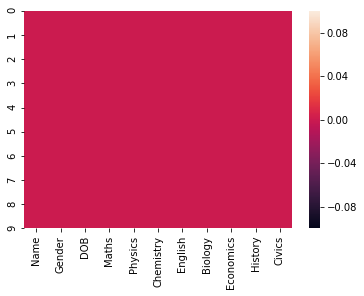

In [12]:
sns.heatmap(df.isnull())

In [23]:
df.shape

(10, 12)

In [14]:
df['Totalmarks'] = df['Maths'] + df['Physics']+df['Chemistry'] + df['English']+df['Biology'] + df['Economics'] + df['History'] + df['Civics']
df.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Totalmarks
0,John,M,05-04-1988,55,45,56,87,21,52,89,65,470
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2,524
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74,556
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45,586
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53,587


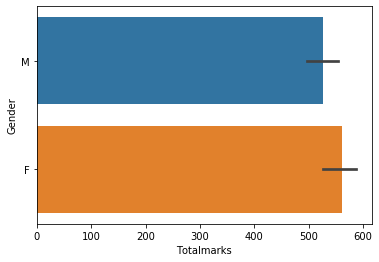

In [22]:
sns.barplot(x='Totalmarks',y='Gender',data=df,orient='h')

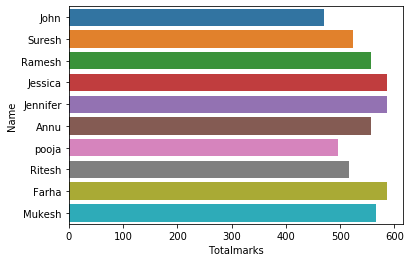

In [24]:
sns.barplot(x='Totalmarks',y='Name',data=df,orient='h')

In [25]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Totalmarks
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.00000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000,544.50000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432,41.01558
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000,470.00000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500,518.75000
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000,556.00000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500,581.00000
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000,587.00000


In [28]:
df.loc[df['Chemistry'] == df['Chemistry'].max()]

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Totalmarks
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74,556
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89,587


In [30]:
df.loc[df['Maths'] == df['Maths'].max()]

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Totalmarks
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77,566


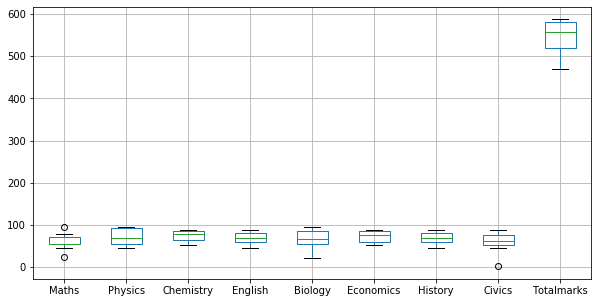

In [38]:
plt.figure(figsize=(10,5))
df.boxplot()

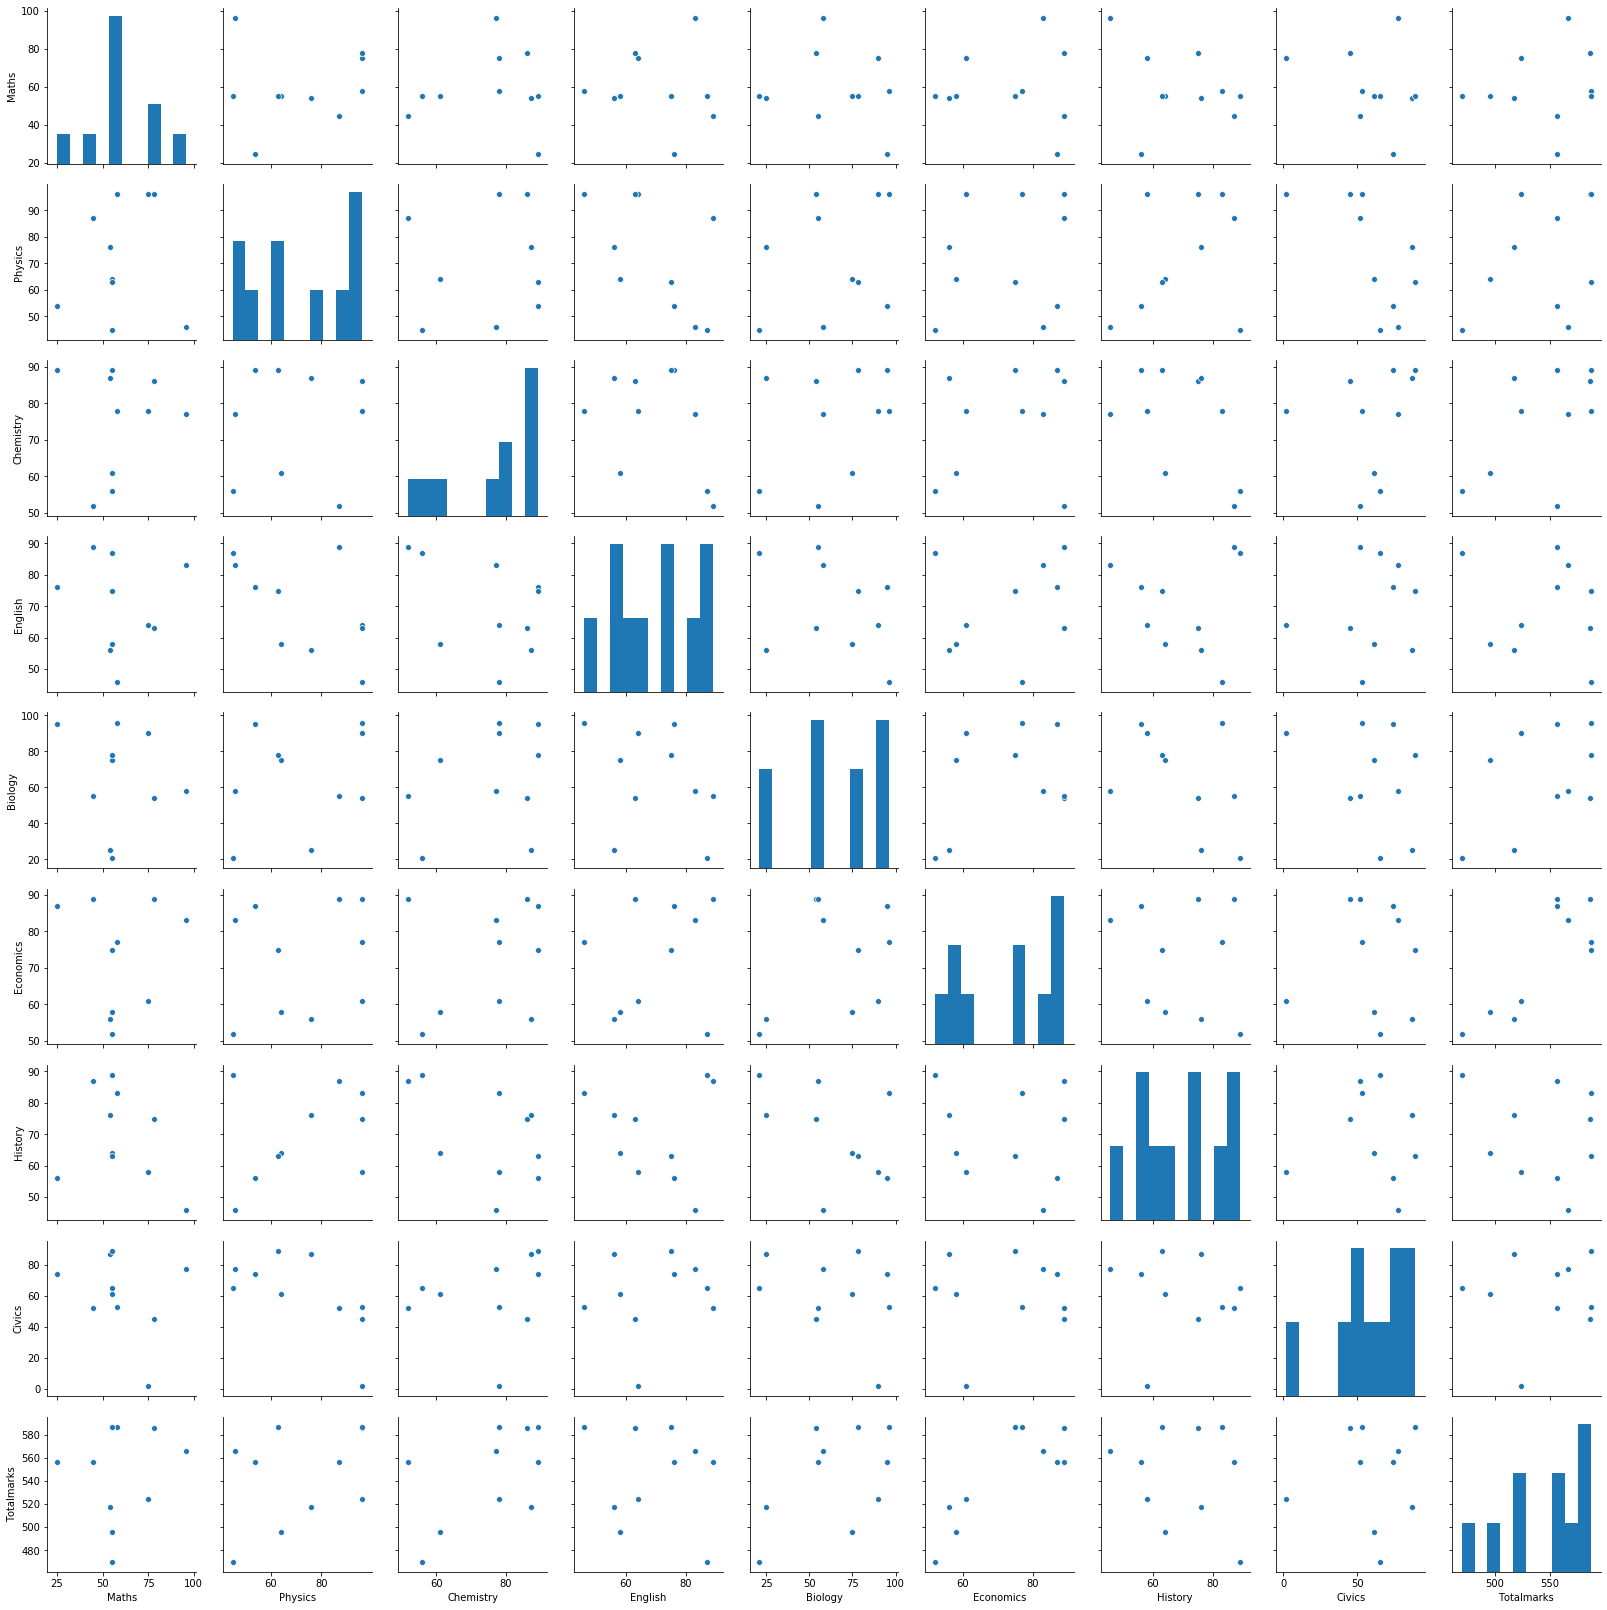

In [33]:
sns.pairplot(df)

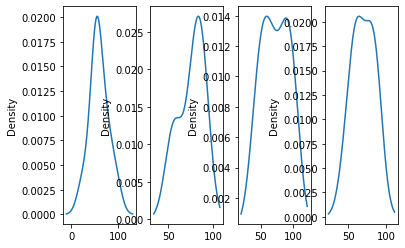

In [44]:
#viewing skewed plot for the columns having skwe above threshold 0.55
f,axes = plt.subplots(1,4)
df['Maths'].plot(kind='kde',ax=axes[0])
df['Chemistry'].plot(kind='kde',ax=axes[1])
df['Physics'].plot(kind='kde',ax=axes[2])
df['English'].plot(kind='kde',ax=axes[3])


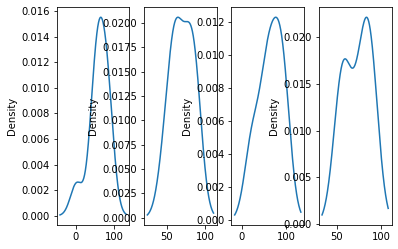

In [46]:
f,axes = plt.subplots(1,4)
df['Civics'].plot(kind='kde',ax=axes[0])
df['History'].plot(kind='kde',ax=axes[1])
df['Biology'].plot(kind='kde',ax=axes[2])
df['Economics'].plot(kind='kde',ax=axes[3])

In [47]:
df.corr()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Totalmarks
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629,0.156049
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266,0.372033
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908,0.545944
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705,-0.132607
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060,0.489008
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905,0.830433
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686,-0.199145
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000,0.082574
Totalmarks,0.156049,0.372033,0.545944,-0.132607,0.489008,0.830433,-0.199145,0.082574,1.000000


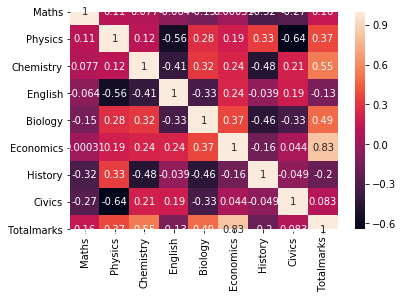

In [49]:
sns.heatmap(df.corr(),annot=True)

In [50]:
df.skew()

Maths         0.246964
Physics      -0.045336
Chemistry    -0.746462
English      -0.131222
Biology      -0.496446
Economics    -0.245555
History      -0.131222
Civics       -1.332448
Totalmarks   -0.642123
dtype: float64

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('Train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.shape

(891, 12)

In [17]:
df.drop(columns=['Cabin'],inplace=True)

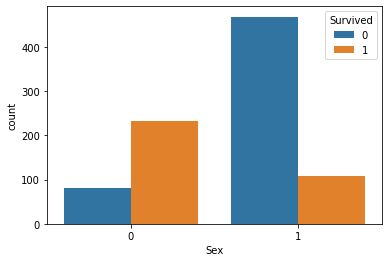

In [21]:
sns.countplot(x='Sex',hue='Survived',data=df)

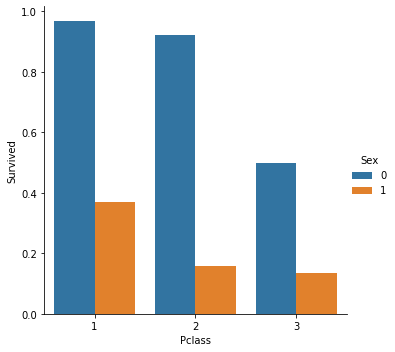

In [22]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df,kind='bar',ci=False)

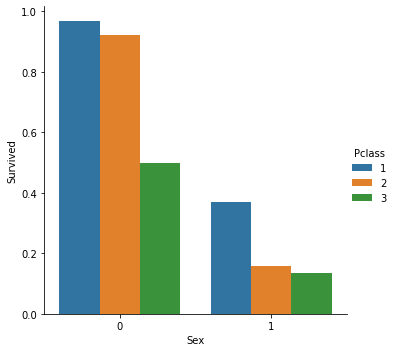

In [23]:
sns.catplot(x='Sex',y='Survived',hue='Pclass',data=df,kind='bar',ci=False)

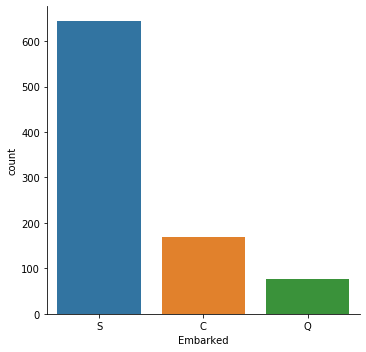

In [24]:
sns.catplot(x='Embarked',data=df,kind='count')